In [1]:
%run ./0_mibrx.ipynb
%run ./1_cotacao.ipynb
%run ./2_balanco.ipynb
%run ./3_financeiro.ipynb
%run ./4_mercado.ipynb
%run ./5_tecnico.ipynb
%run ./6_precodiario.ipynb

True
True


KeyError: 'Ativo'

CPU times: user 129 ms, sys: 11.6 ms, total: 141 ms
Wall time: 867 ms
CPU times: user 37 s, sys: 5.91 s, total: 42.9 s
Wall time: 2min 35s
(1396846, 10) (1396846, 18) (1396846, 43) (91301, 14) (1396846, 6) (1375468, 6) (1396846, 6) (1396846, 3) (1396846, 3) (65778, 3) (1396846, 3) (1396846, 9)


KeyError: 'Ativo'

In [2]:
#Importando pacotes
import pandas as pd
import numpy as np
from urllib.request import urlopen
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import mstats
warnings.filterwarnings("ignore")
from  pandas import ExcelWriter


In [3]:
#MATRIZ IBRX
cot=pd.read_excel('cot.xlsx', sheet_name='Sheet1', index_col='Data')
cot=cot.drop(columns=["Unnamed: 0"])
cot=cot.reset_index()
cot=cot.sort_values(['Ativo', "Data"], ascending=[True, True])
bal=pd.read_excel('bal.xlsx', sheet_name='Sheet1', index_col='Data')
bal=bal.drop(columns=["Unnamed: 0"])
bal=bal.reset_index()
bal=bal.sort_values(['Ativo', "Data"], ascending=[True, True])
mer=pd.read_excel('mer.xlsx', sheet_name='Sheet1', index_col='Data')
mer=mer.drop(columns=["Unnamed: 0"])
mer=mer.reset_index()
mer=mer.sort_values(['Ativo', "Data"], ascending=[True, True])
fin=pd.read_excel('fin.xlsx', sheet_name='Sheet1', index_col='Data')
fin=fin.drop(columns=["Unnamed: 0"])
fin=fin.reset_index()
fin=fin.sort_values(['Ativo', "Data"], ascending=[True, True])
tec=pd.read_excel('tec.xlsx', sheet_name='Sheet1', index_col='Data')
tec=tec.drop(columns=["Unnamed: 0"])
tec=tec.reset_index()
tec=tec.sort_values(['Ativo', "Data"], ascending=[True, True])

In [4]:
#Declarando coluna data como datatime
cot['Data'] = pd.to_datetime(cot['Data'])
bal['Data'] = pd.to_datetime(bal['Data'])
mer['Data'] = pd.to_datetime(mer['Data'])
fin['Data'] = pd.to_datetime(fin['Data'])
tec['Data'] = pd.to_datetime(tec['Data'])

In [5]:
#conc=pd.concat([cot,bal.iloc[:,2:],mer.iloc[:,2:],fin.iloc[:,2:],tec.iloc[:,2:]], axis=1)

In [6]:
ctc=cot.merge(bal, on=["Data", "Ativo", "IBRX"]).merge(mer, on=["Data", "Ativo", "IBRX"]).merge(fin, on=["Data", "Ativo", "IBRX"]).merge(tec, on=["Data", "Ativo", "IBRX"])
ctc = ctc.sort_values(by = ['Data', "Ativo"]).reset_index(drop=True)
ctc

,Data,Ativo,IBRX,fech,abt,min,max,med,qnegs,qtits,...,corr6m,corr1a,corr2a,corr3a,sharp1m,sharp3m,sharp6m,sharp1a,sharp2a,sharp3a
0,2001-12-28,ABEV3,1,0.715486,0.721337,0.715486,0.722190,0.721755,9.0,141.00,...,0.462475,0.427888,0.322039,0.335647,0.388258,6.333400,-0.012430,0.312306,2.296882,2.933324
1,2001-12-28,ABYA3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-12-28,ACES3,1,4.866949,4.946735,4.866949,4.946735,4.866949,15.0,6.73,...,0.565873,0.586230,0.534660,0.447590,-1.172523,4.248590,-0.374981,-0.667736,-0.393948,0.116511
3,2001-12-28,ACES4,1,5.349749,5.582347,5.349749,5.737412,5.582347,256.0,411.39,...,0.727999,0.698938,0.630393,0.517640,0.456466,9.747892,0.202618,-0.489769,-0.386255,0.142097
4,2001-12-28,ACGU3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76812,2022-06-30,VVAX11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76813,2022-06-30,WEGE3,1,26.450000,25.700000,25.530000,26.580000,26.200000,26204.0,10747.50,...,0.516743,0.485687,0.480627,0.568164,1.482722,-1.841436,-0.912832,-0.604686,0.144011,1.007224
76814,2022-06-30,WEGE4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76815,2022-06-30,WIZS3,1,7.890000,7.720000,7.620000,7.920000,7.800000,4274.0,1597.20,...,0.479090,0.532997,0.363320,0.493869,-2.244094,-0.122396,0.297688,-0.825402,0.052075,0.163418


In [7]:
z=len(ctc['Ativo'].unique())
z

311

In [8]:
# #Análise visual de missing
# df=ctc1.copy()
# df = df.sort_values(by=['Data'])
# fontsize = 20
# fig, ax = plt.subplots(1, 1, figsize=[6, 6]) #mude aqui o tamanho da matriz
# msno.matrix(df=df.iloc[:,3:], ax=ax, color=(0.2, 0.2, 0.2), sparkline=False, fontsize=fontsize)

In [9]:
datesx = pd.DataFrame(pd.date_range(ctc.Data.min(), ctc.Data.max(), freq='BM'))
datesx["Data"]=datesx[0]
datesx = datesx.drop(columns = 0)
datesy=pd.DataFrame(np.repeat(datesx.values, z, axis=0))
datesy["Data"]=datesy[0]
datesy = datesy.drop(columns = 0)
datesy["Data"]=pd.to_datetime(datesy["Data"])
datesy 

,Data
0,2001-12-31
1,2001-12-31
2,2001-12-31
3,2001-12-31
4,2001-12-31
...,...
76812,2022-06-30
76813,2022-06-30
76814,2022-06-30
76815,2022-06-30


In [10]:
ctc

,Data,Ativo,IBRX,fech,abt,min,max,med,qnegs,qtits,...,corr6m,corr1a,corr2a,corr3a,sharp1m,sharp3m,sharp6m,sharp1a,sharp2a,sharp3a
0,2001-12-28,ABEV3,1,0.715486,0.721337,0.715486,0.722190,0.721755,9.0,141.00,...,0.462475,0.427888,0.322039,0.335647,0.388258,6.333400,-0.012430,0.312306,2.296882,2.933324
1,2001-12-28,ABYA3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-12-28,ACES3,1,4.866949,4.946735,4.866949,4.946735,4.866949,15.0,6.73,...,0.565873,0.586230,0.534660,0.447590,-1.172523,4.248590,-0.374981,-0.667736,-0.393948,0.116511
3,2001-12-28,ACES4,1,5.349749,5.582347,5.349749,5.737412,5.582347,256.0,411.39,...,0.727999,0.698938,0.630393,0.517640,0.456466,9.747892,0.202618,-0.489769,-0.386255,0.142097
4,2001-12-28,ACGU3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76812,2022-06-30,VVAX11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76813,2022-06-30,WEGE3,1,26.450000,25.700000,25.530000,26.580000,26.200000,26204.0,10747.50,...,0.516743,0.485687,0.480627,0.568164,1.482722,-1.841436,-0.912832,-0.604686,0.144011,1.007224
76814,2022-06-30,WEGE4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76815,2022-06-30,WIZS3,1,7.890000,7.720000,7.620000,7.920000,7.800000,4274.0,1597.20,...,0.479090,0.532997,0.363320,0.493869,-2.244094,-0.122396,0.297688,-0.825402,0.052075,0.163418


In [11]:
ctc["Data"]=datesy["Data"]
ctc

,Data,Ativo,IBRX,fech,abt,min,max,med,qnegs,qtits,...,corr6m,corr1a,corr2a,corr3a,sharp1m,sharp3m,sharp6m,sharp1a,sharp2a,sharp3a
0,2001-12-31,ABEV3,1,0.715486,0.721337,0.715486,0.722190,0.721755,9.0,141.00,...,0.462475,0.427888,0.322039,0.335647,0.388258,6.333400,-0.012430,0.312306,2.296882,2.933324
1,2001-12-31,ABYA3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-12-31,ACES3,1,4.866949,4.946735,4.866949,4.946735,4.866949,15.0,6.73,...,0.565873,0.586230,0.534660,0.447590,-1.172523,4.248590,-0.374981,-0.667736,-0.393948,0.116511
3,2001-12-31,ACES4,1,5.349749,5.582347,5.349749,5.737412,5.582347,256.0,411.39,...,0.727999,0.698938,0.630393,0.517640,0.456466,9.747892,0.202618,-0.489769,-0.386255,0.142097
4,2001-12-31,ACGU3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76812,2022-06-30,VVAX11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76813,2022-06-30,WEGE3,1,26.450000,25.700000,25.530000,26.580000,26.200000,26204.0,10747.50,...,0.516743,0.485687,0.480627,0.568164,1.482722,-1.841436,-0.912832,-0.604686,0.144011,1.007224
76814,2022-06-30,WEGE4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76815,2022-06-30,WIZS3,1,7.890000,7.720000,7.620000,7.920000,7.800000,4274.0,1597.20,...,0.479090,0.532997,0.363320,0.493869,-2.244094,-0.122396,0.297688,-0.825402,0.052075,0.163418


In [12]:
ctc1=ctc[ctc['IBRX']==1]
ctc1

,Data,Ativo,IBRX,fech,abt,min,max,med,qnegs,qtits,...,corr6m,corr1a,corr2a,corr3a,sharp1m,sharp3m,sharp6m,sharp1a,sharp2a,sharp3a
0,2001-12-31,ABEV3,1,0.715486,0.721337,0.715486,0.722190,0.721755,9.0,141.00,...,0.462475,0.427888,0.322039,0.335647,0.388258,6.333400,-0.012430,0.312306,2.296882,2.933324
2,2001-12-31,ACES3,1,4.866949,4.946735,4.866949,4.946735,4.866949,15.0,6.73,...,0.565873,0.586230,0.534660,0.447590,-1.172523,4.248590,-0.374981,-0.667736,-0.393948,0.116511
3,2001-12-31,ACES4,1,5.349749,5.582347,5.349749,5.737412,5.582347,256.0,411.39,...,0.727999,0.698938,0.630393,0.517640,0.456466,9.747892,0.202618,-0.489769,-0.386255,0.142097
18,2001-12-31,AMBV4,1,1.060443,1.091633,1.060443,1.111705,1.089539,164.0,3925.00,...,0.650135,0.523649,0.418675,0.466675,-1.458142,1.083743,-0.513788,-0.118599,0.854977,1.259331
23,2001-12-31,ARCE4,1,2.564976,2.535771,2.483132,2.605723,2.517409,25.0,80.50,...,0.332231,0.398429,0.312541,0.343360,5.381586,11.641948,1.084420,1.076126,0.958145,2.357548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76804,2022-06-30,VIIA3,1,1.920000,2.050000,1.910000,2.130000,2.000000,27492.0,85997.80,...,0.559681,0.572923,0.552701,0.662836,-1.582248,-1.674426,-1.496569,-1.431499,-1.128284,-0.175787
76808,2022-06-30,VIVT3,1,46.772687,45.023432,44.973738,47.249757,46.484458,17191.0,4030.90,...,0.196566,0.304899,0.349956,0.474497,-2.722990,-1.799719,-0.372479,0.646694,0.149619,0.354389
76813,2022-06-30,WEGE3,1,26.450000,25.700000,25.530000,26.580000,26.200000,26204.0,10747.50,...,0.516743,0.485687,0.480627,0.568164,1.482722,-1.841436,-0.912832,-0.604686,0.144011,1.007224
76815,2022-06-30,WIZS3,1,7.890000,7.720000,7.620000,7.920000,7.800000,4274.0,1597.20,...,0.479090,0.532997,0.363320,0.493869,-2.244094,-0.122396,0.297688,-0.825402,0.052075,0.163418


In [13]:
ctc1['evebit1'] = ctc1['evem'] / ctc1['ebit12m']
ctc1['pvp1'] = ctc1['valmerc'] / ctc1['patrliq']
x=ctc1[["Data","evebitemp12m", "evebit1", "pvpa", "pvp1"]][ctc1["Ativo"]=="ITUB3"][ctc1["Data"]>"2006-12-30"]
x.head(10)

,Data,evebitemp12m,evebit1,pvpa,pvp1
36536,2011-09-30,NaN,NaN,2.113527,NaN
36847,2011-10-31,NaN,NaN,1.898744,NaN
37158,2011-11-30,NaN,NaN,1.748464,NaN
37469,2011-12-30,NaN,NaN,1.686988,NaN


Text(0.5, 0, '')

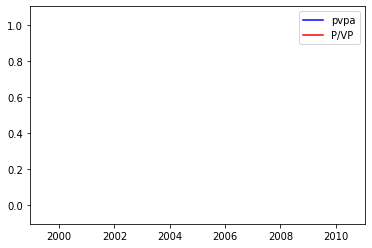

In [14]:
plot2 =plt.plot(x["Data"], x["evebit1"],color='blue',marker='',label="pvpa")
plot2 =plt.plot(x["Data"], x["evebitemp12m"],color='red',marker='',label="P/VP")
plt.legend(loc="upper right")
plt.title('')
plt.xlabel('')

Text(0.5, 0, '')

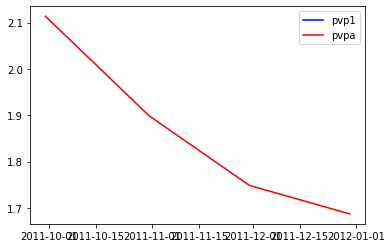

In [15]:
plot2 =plt.plot(x["Data"], x["pvp1"],color='blue',marker='',label="pvp1")
plot2 =plt.plot(x["Data"], x["pvpa"],color='red',marker='',label="pvpa")
plt.legend(loc="upper right")
plt.title('')
plt.xlabel('')

In [16]:
corr1 = x['pvp1'].corr(x['evebit1'])
corr1

nan

In [17]:
#REARRANJO PARA O MODELO DE FACTORING
balanco4 = ctc1
balanco4col = list(range(len(balanco4.iloc[:,3:].columns)))
pv = []
for i in balanco4.iloc[:,3:].columns:
    balanco4col = balanco4[['Data','Ativo',i]]
    balanco4col = balanco4col.pivot_table(values = i, index = 'Data', columns = 'Ativo', dropna=False)
    pv.append(balanco4col)

listnames = list(balanco4.iloc[:,3:].columns)
dictionary = dict(zip(listnames, pv))
dictionary.keys()

dict_keys(['fech', 'abt', 'min', 'max', 'med', 'qnegs', 'qtits', 'vol', 'atvtot', 'atvcir', 'estq', 'atvncirc', 'imob', 'paspl', 'pascir', 'fornec', 'fincp', 'finlp', 'dbntlp', 'provlp', 'patrliq', 'rect12m', 'cpv12m', 'lucrbr12m', 'dspope12m', 'desven12m', 'desadm12m', 'ebit12m', 'resfin12m', 'recfin12m', 'desfin12m', 'lair12m', 'ircs12m', 'lucrliq12m', 'valmerc', 'evem', 'pl12m', 'pvpa', 'psr12m', 'pebitda12m', 'lp12m', 'estcapvmerc', 'evebitdaemp12m', 'evebitemp12m', 'evvd12m', 'lpa12m', 'vdacao12m', 'ebitdaacao12m', 'divttlq', 'divttbt', 'divbrativo', 'divbrpatr', 'dlpl', 'estcap', 'ebitdivbr12m', 'ebitdivlq12m', 'ebitfinb12m', 'ebitfinl12m', 'divbrebitda12m', 'divlqebitda12m', 'divcpdivtt', 'exgat', 'exgpl', 'exgttrec12m', 'afxpl', 'invpl', 'liqger', 'liqcor', 'liqsec', 'capgir', 'capemp', 'pmestq12m', 'pmforn12m', 'pmrecb12m', 'cicfin12m', 'cicope12m', 'ebitda12m', 'lairdfl12m', 'giroat12m', 'giropl12m', 'mrgbru12m', 'mrgebit12m', 'mrglq12m', 'mrgebitda12m', 'rentat12m', 'rtpatfi

In [18]:
writer=pd.ExcelWriter("output.xlsx") 
for key in dictionary:
    dictionary[key].to_excel(writer,sheet_name=key)

writer.save()
writer.close()

In [19]:
valmerc = pd.DataFrame(dictionary['valmerc'])

negoc = pd.DataFrame(dictionary['negc6m'])

cols = valmerc.columns.values
bmatrix = pd.DataFrame(index=negoc.index, columns=cols, data=1)

arr = valmerc.to_numpy()
is_equal = ((arr == arr[None].T).any(axis=1))
is_equal[np.tril_indices_from(is_equal)] = False
inds_of_same_cols = [*zip(*np.where(is_equal))]

h = [inds for inds in inds_of_same_cols]
h2 = valmerc.columns[(h)].tolist()

#negoc = dictionary['negc6m']

donuts = []
for i in h:
    op = pd.DataFrame(negoc.iloc[:,i[0]])
    ap = pd.DataFrame(negoc.iloc[:,i[1]])
    ep = pd.concat([op, ap], axis=1)
    donuts.append(ep)

#donuts[0]
    
for v in range(len(donuts)):
    donuts[v].insert(0,'new',range(len(donuts[v])))


for i in range(len(donuts)):
    for j,a,b in donuts[i].values:
        #print(j,a,b)
        if a < b:
            bmatrix[donuts[i].drop(columns = 'new').columns[0]].iloc[int(j)] = 0
            bmatrix[donuts[i].drop(columns = 'new').columns[1]].iloc[int(j)] = 1
        elif a > b:
            bmatrix[donuts[i].drop(columns = 'new').columns[0]].iloc[int(j)] = 1
            bmatrix[donuts[i].drop(columns = 'new').columns[1]].iloc[int(j)] = 0
        elif pd.isna(a):
            bmatrix[donuts[i].drop(columns = 'new').columns[0]].iloc[int(j)] = 0
        elif pd.isna(b):
            bmatrix[donuts[i].drop(columns = 'new').columns[1]].iloc[int(j)] = 0
            
            
bmatrix.tail(20)

,ABEV3,ABYA3,ACES3,ACES4,ACGU3,AEDU3,AELP3,AESB3,AGEI3,AGIN3,...,VIVR3,VIVT3,VIVT4,VLID3,VVAR11,VVAX11,WEGE3,WEGE4,WIZS3,YDUQ3
Data,,,,,,,,,,,,,,,,,,,,,
2020-11-30,1,1,0,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
2020-12-31,1,1,0,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
2021-01-29,1,1,0,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
2021-02-26,1,1,0,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
2021-03-31,1,1,0,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
2021-04-30,1,1,0,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
2021-05-31,1,1,0,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
2021-06-30,1,1,0,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
2021-07-30,1,1,0,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1


In [20]:
bmatrix.to_excel('liq.xlsx')

In [21]:
#Compatibilizando datas 
ibrx=pd.read_excel('ibrx.xlsx',sheet_name='Sheet1', index_col='Data')
ibrx1 = ibrx.drop(columns = 'TCSL4')
ibrx1 = ibrx1.reindex(sorted(ibrx1.columns), axis=1)

In [22]:
datest = pd.DataFrame(pd.date_range(ctc.Data.min(), ctc.Data.max(), freq='BM'))
datest["Data"]=datest[0]
datest = datest.drop(columns = 0)
datest

,Data
0,2001-12-31
1,2002-01-31
2,2002-02-28
3,2002-03-29
4,2002-04-30
...,...
242,2022-02-28
243,2022-03-31
244,2022-04-29
245,2022-05-31


In [23]:
ibrx1.index=datest["Data"]
ibrx1.head(13)

,ABEV3,ABYA3,ACES3,ACES4,ACGU3,AEDU3,AELP3,AESB3,AGEI3,AGIN3,...,VIVR3,VIVT3,VIVT4,VLID3,VVAR11,VVAX11,WEGE3,WEGE4,WIZS3,YDUQ3
Data,,,,,,,,,,,,,,,,,,,,,
2001-12-31,1,0,1,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2002-01-31,1,0,1,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2002-02-28,1,0,1,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2002-03-29,1,0,1,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2002-04-30,1,0,1,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2002-05-31,1,0,1,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2002-06-28,1,0,1,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2002-07-31,1,0,1,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2002-08-30,1,0,1,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [24]:
ibrx1.to_excel('ibrx1.xlsx')